# Семинар 16
# Задача наименьших квадратов (Least Squares Problem)

## Постановка задачи

1. **Широкая:** пусть даны $m$ пар измерениий $(x_i, y_i)$, где $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. Найти такую функцию $f$, что 
$$
\frac{1}{2}\|f(x_i) - y_i \|^2_2 \to \min
$$

2. **Уже:** пусть даны $m$ пар измерениий $(x_i, y_i)$, где $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. Найти такую *параметрическую* функцию $f(x, w)$, что 
$$
\frac{1}{2}\|f(x_i, w) - y_i \|^2_2 \to \min_w
$$

3. **Ещё уже:** пусть даны $m$ пар измерениий $(x_i, y_i)$, где $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}$. Найти такую *параметрическую* функцию $f(x, w)$, что 
$$
\frac{1}{2} \sum_{i=1}^m(f(x_i, w) - y_i )^2 \to \min_w
$$

## Линейный случай

Рассмотрим случай линейной зависимости между измерениями $x_i \in \mathbb{R}^n$ и $y_i \in \mathbb{R}, \; i = 1,\ldots, m$.

Тогда
$$
f(x, w) = x^{\top}w
$$
или
$$
f(X, W) = XW
$$
Задача наименьших квадратов формулируется в виде
$$
L(w|X, y) = \frac{1}{2}\sum\limits_{i=1}^m (x^{\top}_i w - y_i)^2 = \frac{1}{2}\|Xw - y \|^2_2 \to \min_w
$$

**Замечание.** Везде далее $m \geq n$ и $\mathrm{rank}(X) = n$ кроме специально оговоренных случаев

### Нормальное уравнение

Из необходимого условия минимума первого порядка и выпуклости нормы следует, что 
$$
L'(w^* | X, y) = 0 \Rightarrow (X^{\top}X)w^* = X^{\top}y
$$
или
$$
w^* = (X^{\top}X)^{-1}X^{\top}y = X^+y = X^{\dagger}y,
$$
где $X^{\dagger} = X^+ = (X^{\top}X)^{-1}X^{\top}$ - *псевдообратная матрица*.

**Замечение:** убедитесь, что Вы можете вывести выражение для $w^*$!

**Вопрос:** к какой задаче сведена задача оптимизации?

### Прямые методы

#### Разложение Холецкого

**Определение.** Любая матрица $A \in \mathbb{S}^n_{++}$ имеет единственное разложение Холецкого:
$$
A = LL^{\top},
$$
где $L$ - нижнетреугольная матрица.

Алгоритм:
1. Вычислить $X^{\top}X$ и $X^{\top}y$
2. Вычислить разложение Холецкого матрицы $X^{\top}X$
3. Найти $w^*$ прямой и обратной подстановкой

### Pro & contra

Pro 

- при $m \gg n$ хранение $X^{\top}X$ требует намного меньше памяти, чем хранение $X$
- если матрица $X$ разреженная, существуют методы также дающие разреженное разложение Холецкого 

Contra

- число обусловленности $X^{\top}X$ равно квадрату числа обусловленности $X$. Ошибка пропорциональна обусловленности.
- необходимо вычислить $X^{\top}X$

#### QR разложение

**Определение.** Любую матрицу $A \in \mathbb{R}^{m \times n}$ можно представить в виде
$$
A = QR,
$$
где $Q \in \mathbb{R}^{m \times m}$ - унитарная матрица, а $R \in \mathbb{R}^{m \times n}$ - прямоугольная верхнетреугольная.

#### Применение

1. Вычислить QR разложение матрицы $X$: $X = QR$.
2. $Q = [Q_1, Q_2]$, $Q_1 \in \mathbb{R}^{m \times n}$,
$R = 
\begin{bmatrix}
R_1\\
0
\end{bmatrix}$,
$R_1 \in \mathbb{R}^{n \times n}$ - квадратная верхнетреугольная матрица
2. Задача примет вид: 
$$
\|R_1w - Q_1^{\top}y \|^2_2 \to \min_w
$$
и нормальное уравнение
$$
R_1w^* = Q_1^{\top}y
$$
Получили уравнение с квадратной верхнетреугольной матрицей, которое легко решается обратной подстановкой.

### Pro & contra

Pro 

- ошибка пропорциональна числу обусловленности $X$, а не $X^{\top}X$
- более устойчив, чем использование разложение Холецкого

Contra

- нельзя контролировать устойчивость решения

#### Сингулярное разложение (SVD)

**Определение.** Любую матрицу $A \in \mathbb{R}^{m \times n}$ можно представить в виде
$$
A = U\widehat{\Sigma} V^* = [U_1, U_2] \begin{bmatrix} \Sigma\\ 0 \end{bmatrix} V^*,
$$
где $U \in \mathbb{R}^{m \times m}$ - унитарная матрица, $U_1 \in \mathbb{R}^{m \times n}$, $\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_n) \in \mathbb{R}^{n \times n}$ - диагональная с сингулярными числами $\sigma_i$ на диагонали, и $V \in \mathbb{R}^{n \times n}$ - унитарная.

#### Применение

$$
\| Xw - y\|^2_2 = \left\| \begin{bmatrix} \Sigma \\ 0 \end{bmatrix} V^* w - \begin{bmatrix} U_1^{\top} \\ U_2^{\top} \end{bmatrix}y \right\|^2_2 \sim \| \Sigma V^* w - U_1^{\top}y \|^2_2
$$
Решение линейной системы с **квадратной** матрицей:
$$
w^* = V\Sigma^{-1}U_1^{\top}y = \sum\limits_{i=1}^n \frac{u_i^{\top}y}{\sigma_i} v_i,
$$
где $v_i$ и $u_i$ - столбцы матриц $V$ и $U_1$ 

### Pro & contra

Pro 

- информация о чувствительности решения к возмущениям $y$
- контроль устойчивости: малые сингулярные числа можно отбросить
- если матрица близка к вырожденной, то только SVD позволяет это показать

Contra

- вычисление SVD наиболее затратно по сравнению с QR разложением и разложением Холецкого

### Эксперименты

In [1]:
import numpy as np

n = 1000
m = 2 * n
X = np.random.randn(m, n)
w = np.random.randn(n)
y = X.dot(w) + 1e-5 * np.random.randn(m)

w_est = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(np.linalg.norm(w - w_est))

9.879986234886743e-06


In [2]:
import scipy.linalg as sclin
import scipy.sparse.linalg as scsplin

def CholSolve(X, y):
    res = sclin.cho_factor(X.T.dot(X), lower=True)
    return sclin.cho_solve(res, X.T.dot(y))

def QRSolve(X, y):
    Q, R = sclin.qr(X)
    return sclin.solve_triangular(R[:R.shape[1], :], Q[:, :R.shape[1]].T.dot(y))

def SVDSolve(X, y):
    U, s, V = sclin.svd(X, full_matrices=False)    
    return V.T.dot(np.diagflat(1.0 / s).dot(U.T.dot(y)))

def CGSolve(X, y):
    def mv(x):
        return X.T.dot(X.dot(x))
    LA = scsplin.LinearOperator((X.shape[1], X.shape[1]), matvec=mv)
    w, _ = scsplin.cg(LA, X.T.dot(y), tol=1e-10)
    return w

def NPSolve(X, y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

def LSQRSolve(X, y):
    res = scsplin.lsqr(X, y)
    return res[0]

In [3]:
w_chol = CholSolve(X, y)
print(np.linalg.norm(w - w_chol))
w_qr = QRSolve(X, y)
print(np.linalg.norm(w - w_qr))
w_svd = SVDSolve(X, y)
print(np.linalg.norm(w - w_svd))
w_cg = CGSolve(X, y)
print(np.linalg.norm(w - w_cg))
w_np = NPSolve(X, y)
print(np.linalg.norm(w - w_np))
w_lsqr = LSQRSolve(X, y)
print(np.linalg.norm(w - w_lsqr))

9.87998623568672e-06
9.879986239053383e-06
9.879986237687417e-06
9.879512604510694e-06
9.879986234886743e-06
9.879986068607817e-06


In [4]:
%timeit w_chol = CholSolve(X, y)
%timeit w_qr = QRSolve(X, y)
%timeit w_svd = SVDSolve(X, y)
%timeit w_cg = CGSolve(X, y)
%timeit w_np = NPSolve(X, y)
%timeit w_lsqr = LSQRSolve(X, y)

36 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
297 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
454 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
97.3 ms ± 6.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
43.1 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
174 ms ± 36.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
n = [10, 100, 1000, 2000, 5000]
chol_time = []
qr_time = []
svd_time = []
cg_time = []
np_time = []
lsqr_time = []
for dim in n:
    m = int(1.5 * dim)
    X = np.random.randn(m, dim)
    w = np.random.randn(dim)
    y = X.dot(w) + 1e-5 * np.random.randn(m)
    st = time.time()
    w_chol = CholSolve(X, y)
    chol_time.append(time.time() - st)
    st = time.time()
    w_qr = QRSolve(X, y)
    qr_time.append(time.time() - st)
    st = time.time()
    w_svd = SVDSolve(X, y)
    svd_time.append(time.time() - st)
    st = time.time()
    w_cg = CGSolve(X, y)
    cg_time.append(time.time() - st)
    st = time.time()
    w_np = NPSolve(X, y)
    np_time.append(time.time() - st)
    st = time.time()
    w_lsqr = LSQRSolve(X, y)
    lsqr_time.append(time.time() - st)

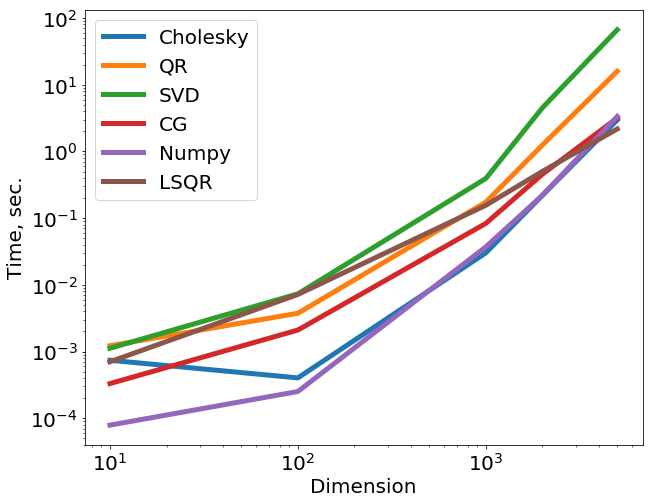

In [6]:
plt.figure(figsize=(10,8))
plt.plot(n, chol_time, linewidth=5, label="Cholesky")
plt.plot(n, qr_time, linewidth=5, label="QR")
plt.plot(n, svd_time, linewidth=5, label="SVD")
plt.plot(n, cg_time, linewidth=5, label="CG")
plt.plot(n, np_time, linewidth=5, label="Numpy")
plt.plot(n, lsqr_time, linewidth=5, label="LSQR")
plt.legend(loc="best", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Dimension", fontsize=20)
plt.ylabel(r"Time, sec.", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Нелинейный случай (J. Nocedal, S. Wright Numerical Optimization, Ch. 10)

**Вопрос:** а если хочется моделировать измерения нелинейной функцией $f(x, w)$?

**Ответ:** если очень хочется, то можно. 

**НО!** Аналитического выражения для решения нет. Нужно использовать итерационный процесс!

### Метод Гаусса-Ньютона

$$
S = \frac{1}{2}\| f(X, w) - y\|^2_2 = \frac{1}{2}\|r(w)\|_2^2 \to \min_w
$$
$$
S' = \sum_{i=1}^m r_i(w)r_i'(w) = J^{\top}(w)r(w), 
$$
где $J$ - якобиан остатков $r(w)$.
\begin{equation*}
\begin{split}
S''(w) = & \sum_{i=1}^m r_i'(w)r_i'(w) + \sum_{i=1}^m r_i(w)r_i''(w) \\
= & J^{\top}(w)J(w) + \sum_{i=1}^m r_i(w)r_i''(w)
\end{split}
\end{equation*}

#### Метод Ньютона 
$$
S''(w_k)h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

$$
\left(J^{\top}(w_k)J(w_k) + \sum_{i=1}^m r_i(w_k)r_i''(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Вопрос:** что меняется с добавлением имени Гаусса?

#### Метод Гаусса-Ньютона 
$$
\left(J^{\top}(w_k)J(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Замечание:** шаг метода определяется линейным поиском с помощью комбинации ранее освещённых правил.

#### Теорема сходимости

**Теорема.** Пусть остатки $r_i(w)$ ограничены и их градиенты Липшицевы, а якобиан $J$ полного ранга. Тогда
$$
\lim_{k \to \infty} J^{\top}(w_k)r_k = 0,
$$
при выборе шага по достаточному убыванию и условию кривизны.

#### Скорость сходимости

$$
\|w_{k+1} - w^* \|_2 \leq \| (J^{\top}J(w^*))^{-1}H(w^*)\| \|w_k - w^* \|_2 + O(\|w_k - w^* \|^2_2)
$$

- Зависит от соотношения между $J^{\top}J$ и $H(w_k) = \sum\limits_{i=1}^m r_i(w_k)r_i''(w_k)$
- Чем меньше $\| (J^{\top}J(w^*))^{-1}H(w^*) \|$, тем быстрее сходимость 
- Если $H(w^*) = 0$, то сходимость локально квадратичная

#### Случай больших остатков

- В этом случае $H(w_k)$ пренебрегать нельзя
- Сигнализирует о неадекватности выбранной параметрической функции $f(X, w)$
- Требует применения *гибридных* алгоритмов, которые работают как метод Гаусса-Ньютона при маленьких остатках и работают как метод Ньютона или квазиньютоновский метод при больших остатках

### Pro & contra

Pro

- не нужно вычислять $r''(w)$
- из якобиана вычисляется оценка гессиана
- используемое приближение гессиана часто очень точное в смысле нормы
- в случае полного ранга якобиана, гарантируется, что полученное направление - это направление убывания
- интерпретация как линеаризация функции $f(x, w)$ около точки экстремума

Contra

- приближение гессиана может быть очень неточным
- если матрица $J^{\top}J$ близка к вырожденной, решение неустойчиво, и даже сходимость не гарантируется

### Метод Левенберга-Марквардта

#### Какие проблемы накопились?

- В методе Ньютона сходимость только **локальная**, но **квадратичная**
- Вырожденность гессиана или его приближения (метод Гаусса-Ньютона) приводит к неустойчивости решения
- Градиентный метод сходится к стационарной точке из **любого** начального приближения, но **линейно**

#### Как решить эти проблемы? Хотя бы частично...


**Идея:** отделить спектр гессиана от 0 с помощью дополнительного слагаемого вида $\lambda I$

Метод Левенберга-Марквардта:

$$
(f''(x_k) + \lambda_k I)h_k = -f'(x_k), \qquad \lambda_k > 0
$$

### Почему это хорошая идея?

- При $\lambda_k \to 0$ метод работает как метод Ньютона
- При $\lambda_k \to \infty$ метод работает как градиентный спуск
- В методе Гаусса-Ньютона слагаемое $\lambda_k I$ является оценкой $H(w_k)$
- Если оценка гессиана $J^{\top}J$ разреженная, то добавление $\lambda_k I$ её не портит и позволяет быстро решать систему уравнений
- Регуляризация исходной задачи - см. далее

### Осталась одна проблема....

Стратегий подбора $\lambda_k$ очень много. Общая идея аналогична backtracking'у:

- задаём начальное приближение
- если убывание функции достаточное, то метод находится в зоне, где хорошо работает квадратичная аппроксимация, следовательно можно ещё уменьшить $\lambda_{k+1}$
- если убывание недостаточно сильное, то надо увеличить $\lambda_k$ и ещё раз получить направление $h_k$ и проверить насколько оно подходит

#### Сходимость

- Доказательства сходимости непросты из-за необходимости учитывать изменения $\lambda_k$
- Гарантируется сходимость к стационарной точке при адекватном моделировании кривизны функции в каждой точке

### Pro & Contra

Pro

- комбинация достоинств ранее изученных методов
- автоматическая адаптация к градиентному методу и методу Ньютона
- улучшенная версия метода Гаусса-Ньютона
- сохранение разреженности оценки гессиана
- стандарт де-факто для решения нелинейной задачи наименьших квадратов [[1]](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm#Implementations)

Contra

- нет универсального рецепта по выбору параметра $\lambda$
- скорость сходимости непостоянна и зависит от адекватности выбора $\lambda_k$

## Некорректные задачи

**Определение** (Жак Адамар и урматы). Задача называется *некорректной*, если не выполняется хотя бы одно условие корректности задачи:

1. Существование решения
2. Единственность решения
3. Непрерывная зависимость от внешних параметров

### Регуляризация

**Определение.** Регуляризацией называют процесс введения дополнительной информации в модель для решения некорректных задач.

Примеры:
- повысить устойчивость с помощью изменения целевой функции
- сделать решение единственным, наложив ограничения
- преобразовать целевую функцию, чтобы решение появилось или стало конечным

#### Тихоновская регуляризация (Ridge или $\ell_2$ регуляризация)

$$
\min_w \|Xw - y \|^2_2 + \frac{\alpha}{2}\|w\|^2_2, \quad \alpha > 0
$$

**Упражнение:** получите аналог нормального уравнения для такой задачи. Какая у модифицированного нормального уравнения интерпретация и почему такая регуляризация работает?

**Алгоритмы** аналогичны линейному случаю без регуляризации.

#### Lasso ($\ell_1$ регуляризация)

$$
\min_w \|Xw - y \|^2_2 + \alpha\|w\|_1, \quad \alpha > 0
$$

Решение получают координатным спуском (может быть, будет рассказан позднее)

Особенности:
- недифференцируемая, но выпуклая целевая функция
- релаксация $\ell_0$
- разреженное решение

#### Elastic Net

$$
\min_w \|Xw - y \|^2_2 + \alpha \rho\|w\|_1 + \alpha\frac{1-\rho}{2}\| w \|^2_2, \quad \rho \in [0, 1], \alpha > 0
$$

Особенности:
- комбинация Lasso и Ridge
- алгоритм - координатный спуск
- более устойчиво, чем Lasso

## Резюме

1. Задача наименьших квадратов
2. Алгоритмы для линейного случая
3. Алгоритмы для нелинейного случая
4. Некорректные задачи и способы их решения